https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

# ARIMA y enfoques relacionados

En esta sesión vamos a usar mini pproyectos completos de inicio a fin sobre como usa modelos de pronóstico, miraremos algunos de ellos...

## Base de datos de esta sesión
Vamos a usar una base de datos original del conjunto o biblioteca de datos del Pacific Observatory Datasets (https://datacatalog.worldbank.org/search/dataset/0062856/Pacific-Observatory-Datasets). Este conjunto de datos contiene varios productos de datos generados por el equipo del GOST para el proyecto Observatorio del Pacífico. El equipo ha investigado y desarrollado nuevos indicadores que integran fuentes geoespaciales y de big data para abordar las lagunas de datos en Papúa Nueva Guinea (PNG) y los países insulares del Pacífico (PIC). Los temas y métodos de investigación se describen en detalle en el siguiente repositorio de Github (https://worldbank.github.io/pacific-observatory/).

En efecto para este ejercicio vamos a usar un conjunto de datos llamado ``Fishing Hours by Exclusive Economic Zone (Global Fishing Watch)`` y puede ser desacargado en el enlace: https://datacatalogfiles.worldbank.org/ddh-published/0062856/DR0092745/EEZ_Fishing_Hours.xlsx?versionId=2023-11-08T20:16:52.3807006Z

### Descripción
- Suma de horas de pesca por zona económica exclusiva estimada por Global Fishing Watch con datos del Sistema de Identificación Automática (AIS). Los datos abarcan 12 países (Islas del Pacífico y Papúa Nueva Guinea). Suma de horas de pesca proporcionada con una frecuencia mensual y desglosada por tipo de arte de pesca detectado.
- Se accedió a los datos a través de la API de GFW bajo una licencia Creative Commons CC BY-NC 4.0. Los usuarios deben adherirse a las condiciones de uso de GFW, proporcionar la atribución y no pueden utilizar los datos con fines comerciales.
- Vigilancia Mundial de la Pesca. 2023, actualizado diariamente. Versión 3 API, 2015-01-2023-10. Conjunto de datos consultado el 2023-10-31 en https://globalfishingwatch.org/our-apis/.
- Para más información sobre la metodología, véase el artículo de la revista asociado: D.A. Kroodsma, J. Mayorga, T. Hochberg, N.A. Miller, K. Boerder, F. Ferretti, A. Wilson, B. Bergman, T.D. White, B.A. Block, P. Woods, B. Sullivan, C. Costello, and B. Worm. "Tracking the global footprint of fisheries." Science 361.6378 (2018). [https://science.sciencemag.org/content/359/6378/904]

### Resumen
Aunque la pesca es una de las actividades más extendidas mediante las cuales los seres humanos cosechan recursos naturales, su huella global es poco conocida y nunca se ha cuantificado directamente. Hemos procesado 22.000 millones de mensajes del sistema de identificación automática y rastreado más de 70.000 buques de pesca industrial entre 2012 y 2016, creando una huella dinámica global del esfuerzo pesquero con una resolución espacial y temporal de dos a tres órdenes de magnitud superior a la de los conjuntos de datos anteriores. Nuestros datos muestran que la pesca industrial se produce en más del 55 % de la superficie oceánica y tiene una extensión espacial más de cuatro veces superior a la de la agricultura. Los patrones globales de pesca son sorprendentemente poco sensibles a las variaciones económicas y medioambientales a corto plazo y responden en gran medida a acontecimientos culturales y políticos como las vacaciones y las vedas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("EEZ_Fishing_Hours.xlsx",parse_dates=True)

In [3]:
data

,Unnamed: 0,date,ym,geartype,hours,vesselIDs,iso3,label
0,0,2015-01,2015-01-01,drifting_longlines,2107.860000,11,FJI,Fiji
1,1,2015-02,2015-02-01,drifting_longlines,1769.413333,8,FJI,Fiji
2,2,2015-03,2015-03-01,drifting_longlines,1665.695833,12,FJI,Fiji
3,3,2015-03,2015-03-01,fishing,269.682778,1,FJI,Fiji
4,4,2015-03,2015-03-01,tuna_purse_seines,8.953333,1,FJI,Fiji
...,...,...,...,...,...,...,...,...
3633,3633,2023-08,2023-08-01,fishing,176.894722,1,WSM,Samoa
3634,3634,2023-08,2023-08-01,pole_and_line,13.215556,1,WSM,Samoa
3635,3635,2023-09,2023-09-01,drifting_longlines,1914.009722,23,WSM,Samoa
3636,3636,2023-10,2023-10-01,drifting_longlines,1368.629167,18,WSM,Samoa


Vamos a usar los datos para algunos de los países involucrados en el dataset solamente, se deja como tarea reproducir todos los cálculos que hagamos acá psra el resto de los paises o para todos...!

In [4]:
data["label"].unique()

array(['Fiji', 'Micronesia', 'Gilbert Islands', 'Line Group',
       'Phoenix Group', 'Marshall Islands', 'Nauru', 'Palau',
       'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Samoa'], dtype=object)

In [5]:
data["ym"],data["date"]=pd.to_datetime(data["ym"]),pd.to_datetime(data["date"])

In [6]:
Micronesia=data[data["label"]=="Micronesia"]

In [7]:
Micronesia

,Unnamed: 0,date,ym,geartype,hours,vesselIDs,iso3,label
299,299,2015-01-01,2015-01-01,drifting_longlines,5503.613333,16,FSM,Micronesia
300,300,2015-01-01,2015-01-01,pole_and_line,1342.647500,9,FSM,Micronesia
301,301,2015-01-01,2015-01-01,tuna_purse_seines,1268.013889,38,FSM,Micronesia
302,302,2015-02-01,2015-02-01,drifting_longlines,5129.236111,13,FSM,Micronesia
303,303,2015-02-01,2015-02-01,pole_and_line,817.969167,12,FSM,Micronesia
...,...,...,...,...,...,...,...,...
647,647,2023-09-01,2023-09-01,fishing,20.634444,1,FSM,Micronesia
648,648,2023-09-01,2023-09-01,tuna_purse_seines,220.361667,9,FSM,Micronesia
649,649,2023-10-01,2023-10-01,drifting_longlines,4774.435000,20,FSM,Micronesia
650,650,2023-10-01,2023-10-01,fishing,17.611944,1,FSM,Micronesia


In [8]:
Micronesia=Micronesia.set_index("date")

In [9]:
Micronesia

,Unnamed: 0,ym,geartype,hours,vesselIDs,iso3,label
date,,,,,,,
2015-01-01,299,2015-01-01,drifting_longlines,5503.613333,16,FSM,Micronesia
2015-01-01,300,2015-01-01,pole_and_line,1342.647500,9,FSM,Micronesia
2015-01-01,301,2015-01-01,tuna_purse_seines,1268.013889,38,FSM,Micronesia
2015-02-01,302,2015-02-01,drifting_longlines,5129.236111,13,FSM,Micronesia
2015-02-01,303,2015-02-01,pole_and_line,817.969167,12,FSM,Micronesia
...,...,...,...,...,...,...,...
2023-09-01,647,2023-09-01,fishing,20.634444,1,FSM,Micronesia
2023-09-01,648,2023-09-01,tuna_purse_seines,220.361667,9,FSM,Micronesia
2023-10-01,649,2023-10-01,drifting_longlines,4774.435000,20,FSM,Micronesia


<AxesSubplot: xlabel='date'>

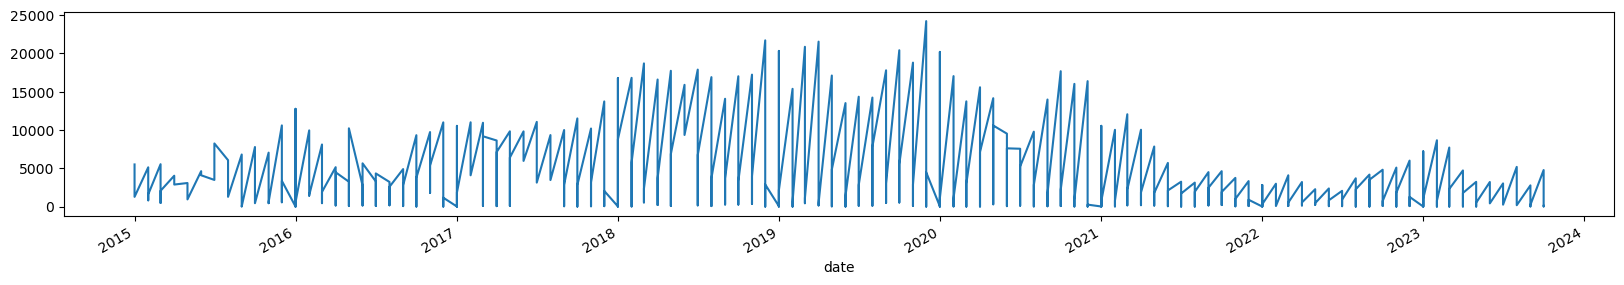

In [10]:
Micronesia["hours"].plot(figsize=(20,3))

# Introducción
Las series temporales ofrecen la posibilidad de predecir valores futuros. Basándose en valores anteriores, las series temporales pueden utilizarse para predecir tendencias en economía, meteorología y planificación de la capacidad, por citar algunos ejemplos. Las propiedades específicas de los datos de series temporales hacen que normalmente se necesiten métodos estadísticos especializados.

En este tutorial, nuestro objetivo será elaborar previsiones fiables de series temporales. Comenzaremos introduciendo y discutiendo los conceptos de autocorrelación, estacionariedad y estacionalidad, y procederemos a aplicar uno de los métodos más utilizados para la previsión de series temporales, conocido como ARIMA.

Uno de los métodos disponibles en Python para modelar y predecir puntos futuros de una serie temporal es el conocido como SARIMAX, que significa Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors. Aquí nos centraremos principalmente en el componente ARIMA, que se utiliza para ajustar datos de series temporales con el fin de comprender y predecir mejor los puntos futuros de la serie temporal.

In [11]:
import warnings
import itertools
import statsmodels.api as sm

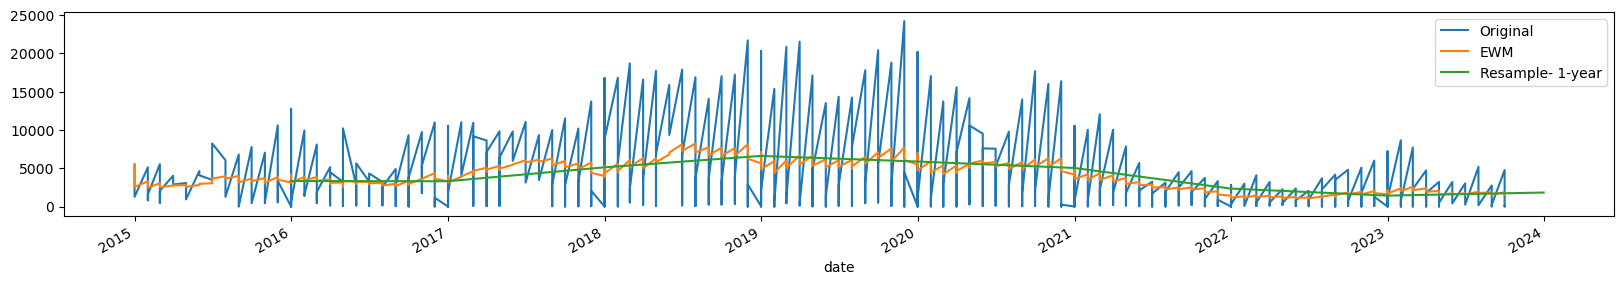

In [12]:
Micronesia["hours"].plot(figsize=(20,3),label="Original")
Micronesia["hours"].ewm(alpha=0.1).mean().plot(figsize=(20,3),label="EWM")
Micronesia["hours"].resample("Y").mean().plot(figsize=(20,3),label="Resample- 1-year")
plt.legend()

## Paso 2 - El modelo ARIMA de series temporales
Uno de los métodos más utilizados en la previsión de series temporales es el modelo ARIMA, que significa media móvil integrada autorregresiva. ARIMA es un modelo que puede ajustarse a los datos de series temporales para comprender mejor o predecir puntos futuros de la serie.

Hay tres números enteros distintos (p, d, q) que se utilizan para parametrizar los modelos ARIMA. Por ello, los modelos ARIMA se denominan ARIMA(p, d, q). En conjunto, estos tres parámetros tienen en cuenta la estacionalidad, la tendencia y el ruido de los conjuntos de datos:

- p es la parte autorregresiva del modelo. Nos permite incorporar el efecto de los valores pasados a nuestro modelo. Intuitivamente, esto sería similar a afirmar que es probable que haga calor mañana si ha hecho calor los últimos 3 días.
- d es la parte integrada del modelo. Incluye los términos del modelo que incorporan la cantidad de diferenciación (es decir, el número de puntos temporales pasados que se restan del valor actual) que se aplica a la serie temporal. Intuitivamente, esto sería similar a afirmar que es probable que mañana haga la misma temperatura si la diferencia de temperatura en los últimos tres días ha sido muy pequeña.
- q es la parte de media móvil del modelo. Esto nos permite establecer el error de nuestro modelo como una combinación lineal de los valores de error observados en momentos anteriores del pasado.

Cuando se trata de efectos estacionales, utilizamos el ARIMA estacional, que se denomina ARIMA(p,d,q)(P,D,Q)s o también SARIMA(p,d,q)(P,D,Q). Aquí, (p, d, q) son los parámetros no estacionales descritos anteriormente, mientras que (P, D, Q) siguen la misma definición pero se aplican al componente estacional de la serie temporal. El término s es la periodicidad de la serie temporal (4 para periodos trimestrales, 12 para periodos anuales, etc.).

El método ARIMA estacional puede parecer desalentador debido a los múltiples parámetros de ajuste que implica. En la siguiente sección, describiremos cómo automatizar el proceso de identificación del conjunto óptimo de parámetros para el modelo de series temporales ARIMA estacional.

## Paso 3 - Selección de parámetros para el modelo de series temporales ARIMA
Cuando queremos ajustar datos de series temporales con un modelo ARIMA estacional, nuestro primer objetivo es encontrar los valores de ARIMA(p,d,q)(P,D,Q)s que optimicen una métrica de interés. Existen muchas directrices y mejores prácticas para lograr este objetivo, pero la parametrización correcta de los modelos ARIMA puede ser un proceso manual minucioso que requiere experiencia en el campo y tiempo. Otros lenguajes de programación estadística, como R, ofrecen métodos automatizados para resolver este problema, pero aún no se han trasladado a Python. En esta sección, resolveremos este problema escribiendo código Python para seleccionar mediante programación los valores óptimos de los parámetros para nuestro modelo de series temporales ARIMA(p,d,q)(P,D,Q)s. Utilizaremos una "búsqueda de cuadrícula" para seleccionar los valores óptimos de los parámetros.

Utilizaremos una "búsqueda de cuadrícula" para explorar iterativamente diferentes combinaciones de parámetros. Para cada combinación de parámetros, ajustamos un nuevo modelo ARIMA estacional con la función SARIMAX() del módulo statsmodels y evaluamos su calidad global. Una vez que hayamos explorado todo el panorama de parámetros, nuestro conjunto óptimo de parámetros será el que produzca el mejor rendimiento para nuestros criterios de interés. Empecemos por generar las distintas combinaciones de parámetros que deseamos evaluar:

In [14]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 2)
SARIMAX: (0, 0, 1) x (0, 1, 0, 2)
SARIMAX: (0, 1, 0) x (0, 1, 1, 2)
SARIMAX: (0, 1, 0) x (1, 0, 0, 2)


Ahora podemos utilizar las tripletas de parámetros definidas anteriormente para automatizar el proceso de entrenamiento y evaluación de modelos ARIMA en diferentes combinaciones. En Estadística y Aprendizaje Automático, este proceso se conoce como búsqueda reticular (u optimización de hiperparámetros) para la selección de modelos.

Cuando se evalúan y comparan modelos estadísticos ajustados con diferentes parámetros, cada uno de ellos se puede clasificar frente a otro en función de lo bien que se ajuste a los datos o de su capacidad para predecir con exactitud puntos de datos futuros. Utilizaremos el valor AIC (Criterio de Información de Akaike), que se devuelve convenientemente con los modelos ARIMA ajustados mediante statsmodels. El AIC mide lo bien que un modelo se ajusta a los datos teniendo en cuenta la complejidad global del modelo. A un modelo que se ajuste muy bien a los datos utilizando muchas características se le asignará una puntuación AIC mayor que a un modelo que utilice menos características para lograr la misma bondad de ajuste. Por lo tanto, nos interesa encontrar el modelo que produzca el valor AIC más bajo.

El fragmento de código siguiente itera a través de combinaciones de parámetros y utiliza la función SARIMAX de statsmodels para ajustar el modelo ARIMA estacional correspondiente. Aquí, el argumento order especifica los parámetros (p, d, q), mientras que el argumento seasonal_order especifica el componente estacional (P, D, Q, S) del modelo ARIMA estacional. Después de ajustar cada modelo SARIMAX()el código imprime su puntuación AIC respectiva.

### Vamos a probar...!

In [15]:
y = Micronesia['hours']

<AxesSubplot: xlabel='date'>

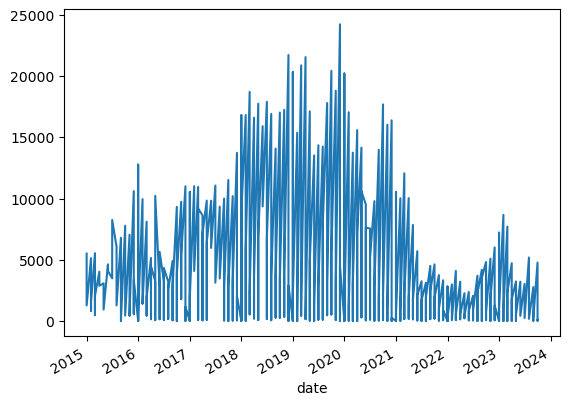

In [16]:
y.plot()

In [17]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=-2)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 2)12 - AIC:7196.101743757556
ARIMA(0, 0, 0)x(0, 0, 1, 2)12 - AIC:7149.200504374141
ARIMA(0, 0, 0)x(0, 1, 0, 2)12 - AIC:7310.471393219988
ARIMA(0, 0, 0)x(0, 1, 1, 2)12 - AIC:7011.578936814917
ARIMA(0, 0, 0)x(1, 0, 0, 2)12 - AIC:7160.309581337291
ARIMA(0, 0, 0)x(1, 0, 1, 2)12 - AIC:7009.165353272056
ARIMA(0, 0, 0)x(1, 1, 0, 2)12 - AIC:7098.363088923337
ARIMA(0, 0, 0)x(1, 1, 1, 2)12 - AIC:6950.026810456055
ARIMA(0, 0, 1)x(0, 0, 0, 2)12 - AIC:7160.677157515434
ARIMA(0, 0, 1)x(0, 0, 1, 2)12 - AIC:7120.252651402883
ARIMA(0, 0, 1)x(0, 1, 0, 2)12 - AIC:7124.3246045133055
ARIMA(0, 0, 1)x(0, 1, 1, 2)12 - AIC:7004.01972820559
ARIMA(0, 0, 1)x(1, 0, 0, 2)12 - AIC:7157.769092017608
ARIMA(0, 0, 1)x(1, 0, 1, 2)12 - AIC:6979.924138771639
ARIMA(0, 0, 1)x(1, 1, 0, 2)12 - AIC:7059.3494778857075
ARIMA(0, 0, 1)x(1, 1, 1, 2)12 - AIC:6859.426192721856
ARIMA(0, 1, 0)x(0, 0, 0, 2)12 - AIC:7321.298040157339
ARIMA(0, 1, 0)x(0, 0, 1, 2)12 - AIC:7256.561230818548
ARIMA(0, 1, 0)x(0, 1, 0, 2)

In [18]:
parameters,PARAMETERS,AIC=[],[],[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=-1)
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            parameters.append(param)
            PARAMETERS.append(param_seasonal)
            AIC.append(results.aic)
        except:
            continue
resultados=pd.DataFrame({"Tendencia":parameters,"Estacionalidad":PARAMETERS,"AIC":AIC})

In [19]:
resultados

,Tendencia,Estacionalidad,AIC
0,"(0, 0, 0)","(0, 0, 0, 2)",7196.101744
1,"(0, 0, 0)","(0, 0, 1, 2)",7149.200504
2,"(0, 0, 0)","(0, 1, 0, 2)",7310.471393
3,"(0, 0, 0)","(0, 1, 1, 2)",7011.578937
4,"(0, 0, 0)","(1, 0, 0, 2)",7160.309581
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 2)",7183.157814
60,"(1, 1, 1)","(1, 0, 0, 2)",6903.390016
61,"(1, 1, 1)","(1, 0, 1, 2)",6882.366961
62,"(1, 1, 1)","(1, 1, 0, 2)",7221.704297


In [20]:
resultados[resultados["AIC"]==resultados["AIC"].min()]

,Tendencia,Estacionalidad,AIC
47,"(1, 0, 1)","(1, 1, 1, 2)",6857.4691


In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 2),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91639D+00    |proj g|=  6.60792D-02

At iterate    5    f=  9.89727D+00    |proj g|=  4.99771D-02

At iterate   10    f=  9.89479D+00    |proj g|=  3.84370D-03

At iterate   15    f=  9.89476D+00    |proj g|=  2.24292D-04

At iterate   20    f=  9.89475D+00    |proj g|=  3.70820D-03

At iterate   25    f=  9.89255D+00    |proj g|=  4.76796D-02

At iterate   30    f=  9.74803D+00    |proj g|=  2.41650D-01

At iterate   35    f=  9.69902D+00    |proj g|=  4.76715D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected 

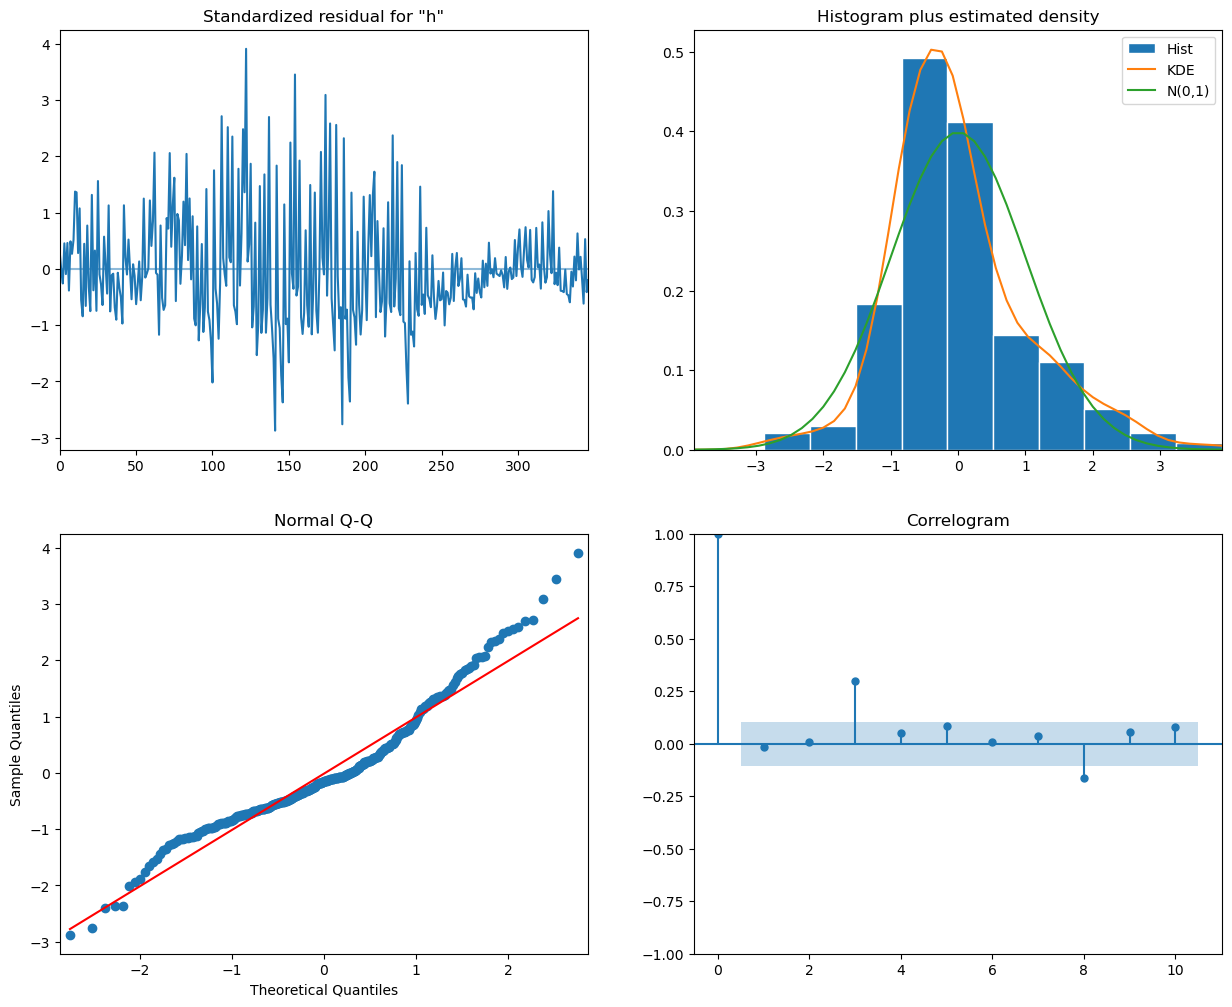

In [22]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()

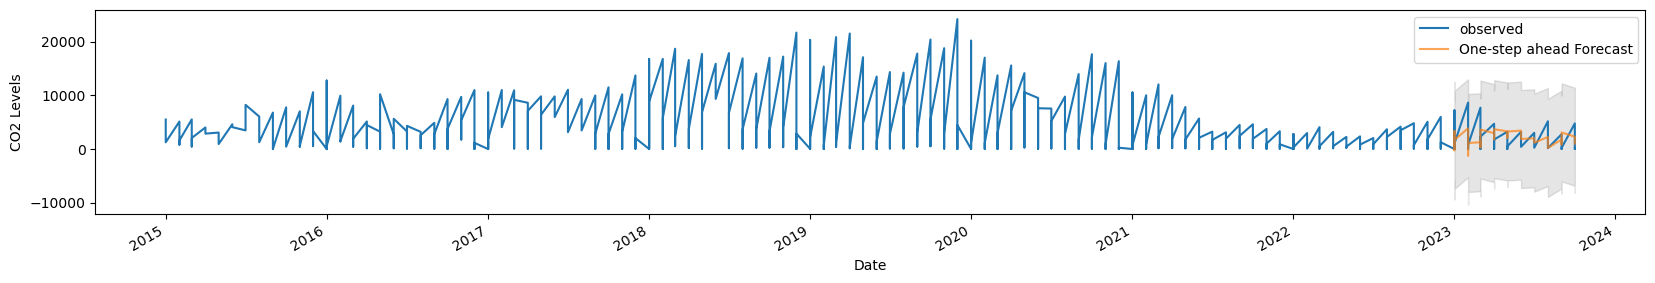

In [24]:
ax = y.plot(label='observed',figsize=(20,3))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
print("Root mean squared error =", np.sqrt(mean_squared_error(pred.predicted_mean,y["2023":])))
print("R2 score =", r2_score(pred.predicted_mean,y["2023":]))

Root mean squared error = 2183.6749425409
R2 score = -2.3935963137550123


# Revisemos todo 
y hagamos las cosas bien desde el inicio, por ahora fuimos muy rápido, pero hay que considerar cosas....

Para decidir si utilizar ARIMA o SARIMA, hay que tener en cuenta las características de los datos de las series temporales y, en particular, si tienen un componente estacional. He aquí un diagrama de flujo que puede guiarnos en el proceso de toma de decisiones:

1. **Comprobación de la estacionalidad**: Trace los datos de la serie temporal y observe si existe un patrón claro que se repita a intervalos regulares. La estacionalidad puede manifestarse en patrones diarios, semanales, mensuales u otros patrones regulares.
2. **Decida el componente estacional**: Si existe un patrón estacional claro, considere la posibilidad de utilizar SARIMA. Si no hay estacionalidad aparente, ARIMA podría ser más apropiado.
3. **Evalúe la estacionariedad**: Compruebe si los datos de la serie temporal son estacionarios. Estacionariedad significa que las propiedades estadísticas de los datos (por ejemplo, media, varianza) no cambian con el tiempo. Si los datos no son estacionarios, aplique la diferenciación hasta alcanzar la estacionariedad. El orden de diferenciación se indica mediante el parámetro $d$ en ARIMA.
4. **Análisis ACF y PACF**: Trace la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) de la serie diferenciada. Si hay picos significativos en los rezagos estacionales, SARIMA puede ser necesario. Si los picos se producen en rezagos no estacionales, ARIMA podría ser más apropiado.
5. **Determine el orden ARIMA (p, d, q)**:
   - Identifique el orden del componente autorregresivo (AR) (p) observando el PACF.
   - Identifique el orden del componente de media móvil (MA) (q) observando la ACF.
   - Determine el orden de diferenciación (d) basándose en el número de diferencias necesarias para lograr la estacionariedad.
6. **Determine el orden SARIMA (P, D, Q, m)**:
   - Si existe un patrón estacional claro, determine el orden de los componentes autorregresivos estacionales (SAR) y de media móvil (SMA) (P y Q) examinando el ACF y el PACF estacionales.
   - Determine el orden de la diferenciación estacional (D).
   - Determinar el período estacional (m), que es el número de pasos temporales de cada estación.
7. **Ajuste el modelo**: Ajuste el modelo ARIMA o SARIMA utilizando los órdenes determinados.
8. **Evaluación del modelo**: Evalúe el rendimiento del modelo utilizando las métricas apropiadas.
Compruebe la aleatoriedad y la autocorrelación de los residuos.
9. **Predicción**: Utilice el modelo ajustado para hacer previsiones sobre nuevos datos.

# Mismo ejemplo paso a paso

In [26]:
data=pd.read_excel("EEZ_Fishing_Hours.xlsx",parse_dates=True)
data["ym"],data["date"]=pd.to_datetime(data["ym"]),pd.to_datetime(data["date"])
Micronesia=data[data["label"]=="Micronesia"]
Micronesia=Micronesia[["date","hours","vesselIDs"]]
Micronesia=Micronesia.set_index("date")
Micronesia = Micronesia.groupby(pd.Grouper(freq='MS')).sum()

In [27]:
Micronesia

,hours,vesselIDs
date,,
2015-01-01,8114.274722,63
2015-02-01,7541.958333,63
2015-03-01,8076.098333,70
2015-04-01,6905.523889,70
2015-05-01,4013.308056,41
...,...,...
2023-06-01,3630.151389,35
2023-07-01,3271.790833,30
2023-08-01,5363.330000,42


In [28]:
y=Micronesia["hours"]
y

date
2015-01-01    8114.274722
2015-02-01    7541.958333
2015-03-01    8076.098333
2015-04-01    6905.523889
2015-05-01    4013.308056
                 ...     
2023-06-01    3630.151389
2023-07-01    3271.790833
2023-08-01    5363.330000
2023-09-01    3011.922222
2023-10-01    4887.416389
Freq: MS, Name: hours, Length: 106, dtype: float64

In [29]:
y

date
2015-01-01    8114.274722
2015-02-01    7541.958333
2015-03-01    8076.098333
2015-04-01    6905.523889
2015-05-01    4013.308056
                 ...     
2023-06-01    3630.151389
2023-07-01    3271.790833
2023-08-01    5363.330000
2023-09-01    3011.922222
2023-10-01    4887.416389
Freq: MS, Name: hours, Length: 106, dtype: float64

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
# 1. Comprobación de la estacionalidad:
# Decompose the time series
result_est = seasonal_decompose(y, model='add')

In [31]:
# Decompose the time series
y=y.resample("M").sum()
# The term bfill means that we use the value before filling in missing values
y=y.fillna(method='ffill')

In [32]:
y

date
2015-01-31    8114.274722
2015-02-28    7541.958333
2015-03-31    8076.098333
2015-04-30    6905.523889
2015-05-31    4013.308056
                 ...     
2023-06-30    3630.151389
2023-07-31    3271.790833
2023-08-31    5363.330000
2023-09-30    3011.922222
2023-10-31    4887.416389
Freq: M, Name: hours, Length: 106, dtype: float64

In [33]:
result_est = seasonal_decompose(y, model='add')

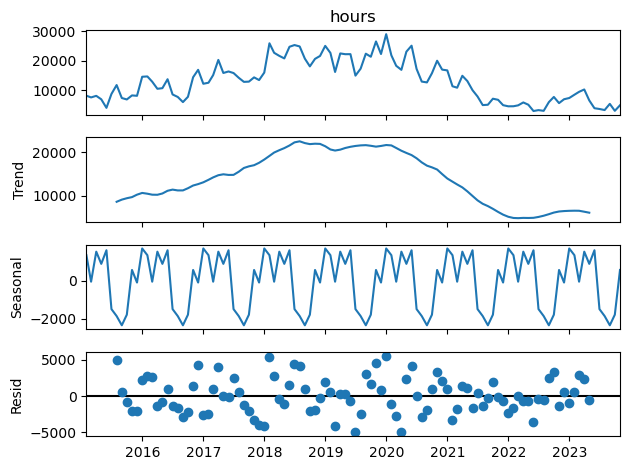

In [34]:
result_est.plot()
plt.show()

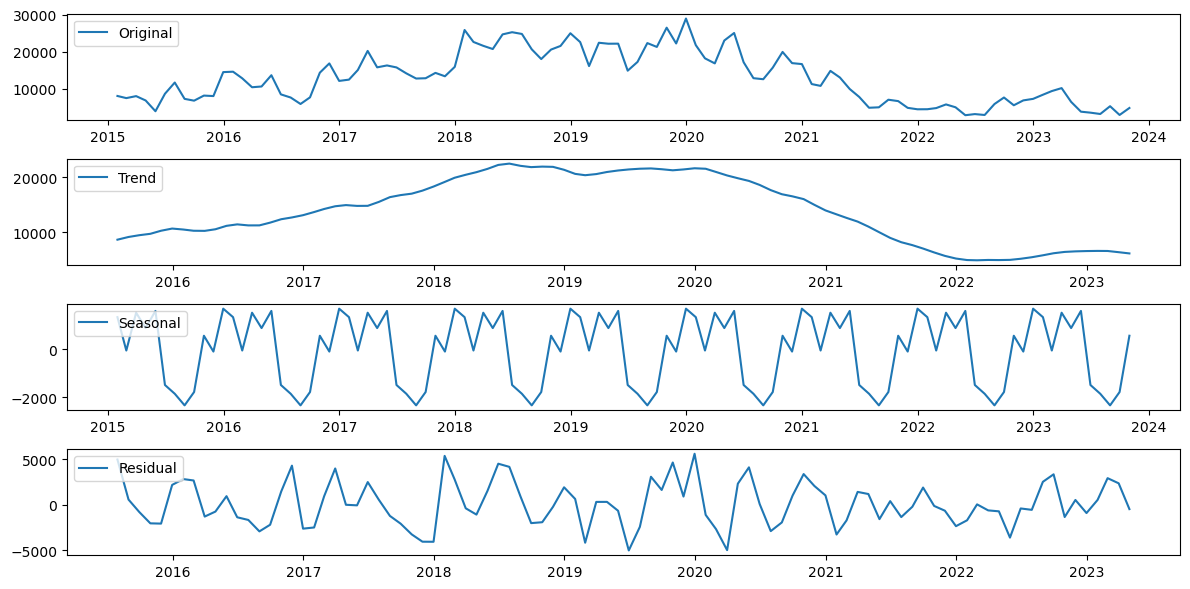

In [35]:
# Plot the components
plt.figure(figsize=(12, 6))
# Original time series
plt.subplot(4, 1, 1)
plt.plot(y, label='Original')
plt.legend(loc='upper left')
# Trend component
plt.subplot(4, 1, 2)
plt.plot(result_est.trend, label='Trend')
plt.legend(loc='upper left')
# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result_est.seasonal, label='Seasonal')
plt.legend(loc='upper left')
# Residual component
plt.subplot(4, 1, 4)
plt.plot(result_est.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

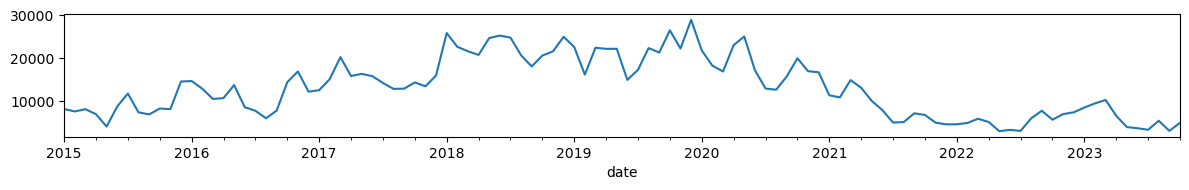

In [36]:
# 3. Evaluando la estacionariedad
# 3.1. Visualmente
plt.figure(figsize=(12, 2))
y.plot()
plt.tight_layout()
plt.show()

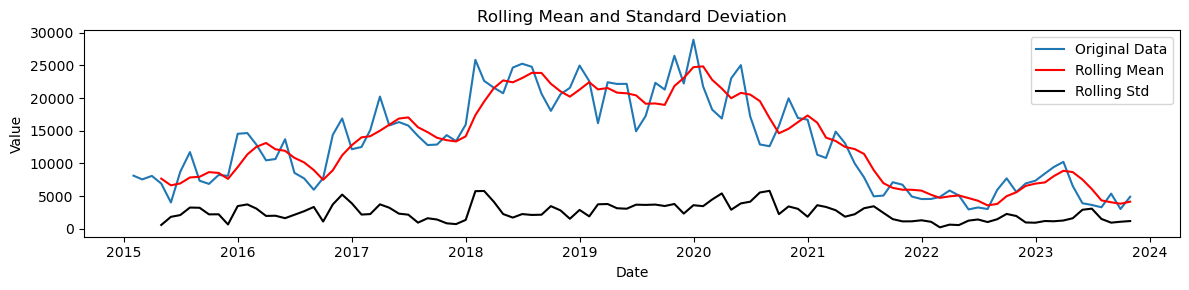

In [37]:
# 3.2. Rolling Statistics:
## Plot the rolling mean and rolling standard deviation to see if they remain relatively constant over time.
# Calculate rolling statistics
rolling_mean = y.rolling(window=4).mean()  # Adjust the window size as needed
rolling_std = y.rolling(window=4).std()
# Plot the original data with rolling statistics
plt.figure(figsize=(12, 3))
plt.plot(y, label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# 3.3. Statistical Test:
## Augmented Dickey-Fuller Test:
## Use the Augmented Dickey-Fuller (ADF) test to formally test for stationarity. The null hypothesis of the ADF test is that the time series has a unit root (non-stationary), and the alternative hypothesis is that it is stationary.
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result_adf = adfuller(y)  # Replace 'column_name' with the actual column containing your data

# Print the test statistic and p-value
print(f'Test Statistic: {result_adf[0]}')
print(f'P-value: {result_adf[1]}')
print(f'Critical Values: {result_adf[4]}')

Test Statistic: -1.1937787842056002
P-value: 0.6762661798762699
Critical Values: {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}


Recordar que la hipótesis nula es siempre que la serie es estacionaria... En términos prácticos:

Si el valor p > 0,05 (o el nivel de significación elegido):
No se rechaza la hipótesis nula.
Es probable que la serie temporal no sea estacionaria.
Dado que el valor p es de 0,67, parece que los datos no son estacionarios.

Para que la serie temporal sea estacionaria, es posible que tenga que aplicar la diferenciación. Dado que ha identificado estacionalidad en sus series, puede que también desee probar la diferenciación estacional.

A continuación se explica cómo realizar la diferenciación en Python:

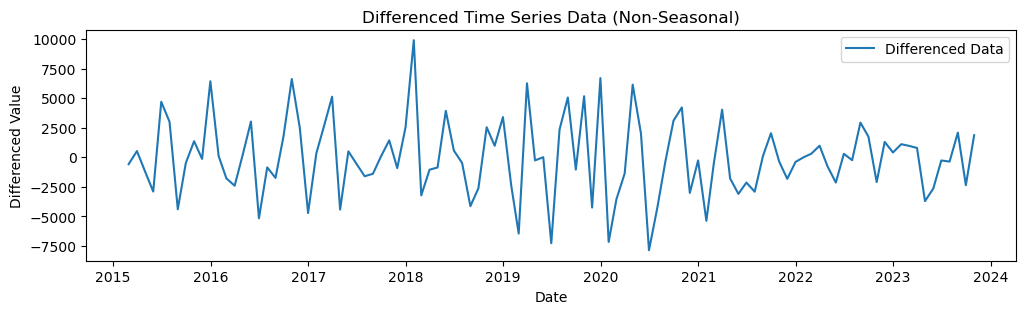

In [39]:
# First, try regular differencing (non-seasonal)
y_diff = y.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 3))
plt.plot(y_diff, label='Differenced Data')
plt.title('Differenced Time Series Data (Non-Seasonal)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()

In [40]:
# Perform Augmented Dickey-Fuller test
result_adf_diff = adfuller(y_diff)  

# Print the test statistic and p-value
print(f'Test Statistic: {result_adf_diff[0]}')
print(f'P-value: {result_adf_diff[1]}')
print(f'Critical Values: {result_adf_diff[4]}')

Test Statistic: -9.674147145555473
P-value: 1.2538127868804688e-16
Critical Values: {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}


Estadística de la prueba: La estadística de la prueba (muy por debajo de los valores críticos) indica una fuerte evidencia contra la hipótesis nula, proporcionando apoyo para que los datos sean estacionarios.

Valor p: Un valor p muy bajo (1,25e-16) apoya aún más el rechazo de la hipótesis nula. El valor p extremadamente pequeño indica un alto nivel de confianza en la estacionariedad de las series diferenciadas.

Por lo tanto, la serie diferenciada de primer orden parece haber alcanzado la estacionariedad. Esto significa que la serie es ahora adecuada para el modelado utilizando métodos que asumen estacionariedad, como los modelos ARIMA o SARIMA.

Puede proceder a ajustar un modelo ARIMA o SARIMA a esta serie diferenciada para realizar previsiones o análisis posteriores. Si utiliza un modelo ARIMA, el orden de diferenciación (d) sería 1 en este caso.


Con la serie estacionaria y_diff, la decisión entre ARIMA y SARIMA depende de si queda un componente estacional en la serie diferenciada.

He aquí cómo puede determinar si utilizar ARIMA o SARIMA:

Pasos para decidir entre ARIMA y SARIMA:
Compruebe si queda estacionalidad:

Examine los gráficos ACF y PACF de la serie diferenciada y_diff.
Busque cualquier pico significativo en los rezagos estacionales en el ACF y PACF, lo que podría indicar estacionalidad restante.
Análisis ACF y PACF:

Si hay picos significativos en los rezagos estacionales en el ACF y PACF después de diferenciar, sugiere la presencia de estacionalidad.
Los picos significativos en los rezagos estacionales podrían indicar la necesidad de un componente estacional, lo que sugiere el uso de SARIMA.
Identificar los componentes estacionales:

Si hay patrones estacionales claros en el ACF y PACF después de diferenciar, considere un modelo SARIMA con órdenes estacionales apropiados (P, D, Q, y m).
Si no hay picos significativos en los rezagos estacionales en el ACF y el PACF después de la diferenciación, un modelo ARIMA podría ser suficiente sin necesidad de componentes estacionales.

Una vez que haya evaluado el ACF y el PACF de las series diferenciadas, puede determinar si SARIMA (ARIMA estacional) es necesario basándose en la presencia de picos significativos en los retardos estacionales. Si hay pruebas de estacionalidad remanente, SARIMA podría ser más adecuado. De lo contrario, puede proceder con un modelo ARIMA.

<Figure size 1200x600 with 0 Axes>

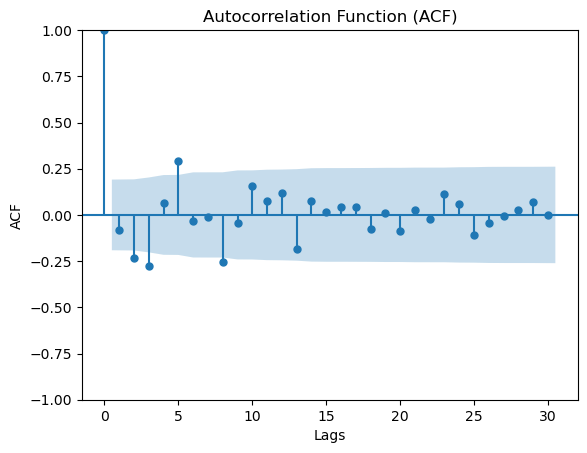

<Figure size 1200x600 with 0 Axes>

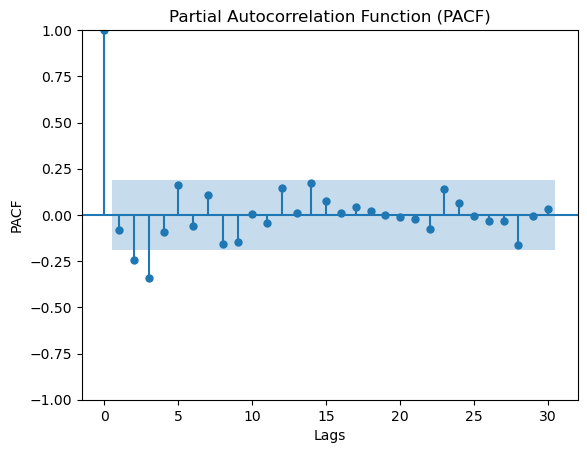

In [41]:
#4. ACF and PACF analysis:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming y_diff is your differenced series
# Replace 'y_diff' with the variable name of your differenced series

plt.figure(figsize=(12, 6))

# ACF plot
plot_acf(y_diff, lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))

# PACF plot
plot_pacf(y_diff, lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

Parece que no hay estacionalidad por lo que un modelo ARIMA sobre la serie diferenciada será lo mejor

Una vez que haya ajustado un modelo ARIMA a la serie diferenciada, las previsiones generadas por el modelo estarán en el espacio diferenciado. Para interpretar estas previsiones en términos de los datos originales, tendrá que invertir el proceso de diferenciación para obtener predicciones en la escala original.

He aquí una explicación sencilla de cómo interpretar las previsiones:

Generación de previsiones:

El modelo ARIMA generará previsiones para la serie diferenciada (y_diff).
Diferenciación inversa:

Para volver a traducir estas previsiones a la escala original, tendrá que invertir el proceso de diferenciación sumando acumulativamente las diferencias pronosticadas.
Pasos para interpretar las previsiones ARIMA:
Generar previsiones:

Utilice el modelo ARIMA ajustado para generar previsiones para las series diferenciadas.
Invertir la diferenciación:

Para volver a convertir los pronósticos diferenciados a la escala original, aplique la diferenciación inversa sumando acumulativamente las diferencias pronosticadas.
He aquí un ejemplo de cómo invertir el proceso de diferenciación en Python:

In [42]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 2) for x in list(itertools.product(p, d, q))]

In [43]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=-2)
            print('ARIMA{} - AIC:{}'.format(param, results.aic))
        except:
            continue

ARIMA(0, 0, 0) - AIC:1978.3142216458828
ARIMA(0, 0, 0) - AIC:1938.607504647635
ARIMA(0, 0, 0) - AIC:2034.0497452552293
ARIMA(0, 0, 0) - AIC:1917.756551401218
ARIMA(0, 0, 0) - AIC:1956.468188661598
ARIMA(0, 0, 0) - AIC:1940.3235499067011
ARIMA(0, 0, 0) - AIC:1966.9925889946312
ARIMA(0, 0, 0) - AIC:1911.6914170778164
ARIMA(0, 0, 1) - AIC:1960.594837022165
ARIMA(0, 0, 1) - AIC:1917.971037601191
ARIMA(0, 0, 1) - AIC:2006.2093442137334
ARIMA(0, 0, 1) - AIC:1920.507593866603
ARIMA(0, 0, 1) - AIC:1954.6748994012655
ARIMA(0, 0, 1) - AIC:1919.7077818875532
ARIMA(0, 0, 1) - AIC:1967.629512764571
ARIMA(0, 0, 1) - AIC:1919.5059261713286
ARIMA(0, 1, 0) - AIC:2039.6194468319813
ARIMA(0, 1, 0) - AIC:2003.5038551939012
ARIMA(0, 1, 0) - AIC:2076.5307178908697
ARIMA(0, 1, 0) - AIC:1973.440111045757
ARIMA(0, 1, 0) - AIC:2022.3743582171783
ARIMA(0, 1, 0) - AIC:2005.1683091807217
ARIMA(0, 1, 0) - AIC:2020.496926006268
ARIMA(0, 1, 0) - AIC:1972.343258068252
ARIMA(0, 1, 1) - AIC:1951.4565239552626
ARIMA(0, 1

In [44]:
parameters,PARAMETERS,AIC=[],[],[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_diff,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=-1)
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            parameters.append(param)
            PARAMETERS.append(param_seasonal)
            AIC.append(results.aic)
        except:
            continue
resultados=pd.DataFrame({"Tendencia":parameters,"Estacionalidad":PARAMETERS,"AIC":AIC})

In [45]:
resultados

,Tendencia,Estacionalidad,AIC
0,"(0, 0, 0)","(0, 0, 0, 2)",1978.314222
1,"(0, 0, 0)","(0, 0, 1, 2)",1938.607505
2,"(0, 0, 0)","(0, 1, 0, 2)",2034.049745
3,"(0, 0, 0)","(0, 1, 1, 2)",1917.756551
4,"(0, 0, 0)","(1, 0, 0, 2)",1956.468189
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 2)",1880.450312
60,"(1, 1, 1)","(1, 0, 0, 2)",1929.165447
61,"(1, 1, 1)","(1, 0, 1, 2)",1911.461523
62,"(1, 1, 1)","(1, 1, 0, 2)",1934.199553


In [46]:
resultados[resultados["AIC"]==resultados["AIC"].min()]

,Tendencia,Estacionalidad,AIC
63,"(1, 1, 1)","(1, 1, 1, 2)",1875.302598


In [47]:
mod = sm.tsa.statespace.SARIMAX(y_diff,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 2),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25326D+00    |proj g|=  2.28052D-01

At iterate    5    f=  9.15108D+00    |proj g|=  1.79063D-02

At iterate   10    f=  9.15089D+00    |proj g|=  1.19096D-04

At iterate   15    f=  9.15089D+00    |proj g|=  7.23353D-04

At iterate   20    f=  9.15080D+00    |proj g|=  6.67592D-03

At iterate   25    f=  9.13991D+00    |proj g|=  6.95633D-02

At iterate   30    f=  8.93647D+00    |proj g|=  1.30130D-01

At iterate   35    f=  8.88296D+00    |proj g|=  5.28519D-02

At iterate   40    f=  8.88239D+00    |proj g|=  1.18434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final

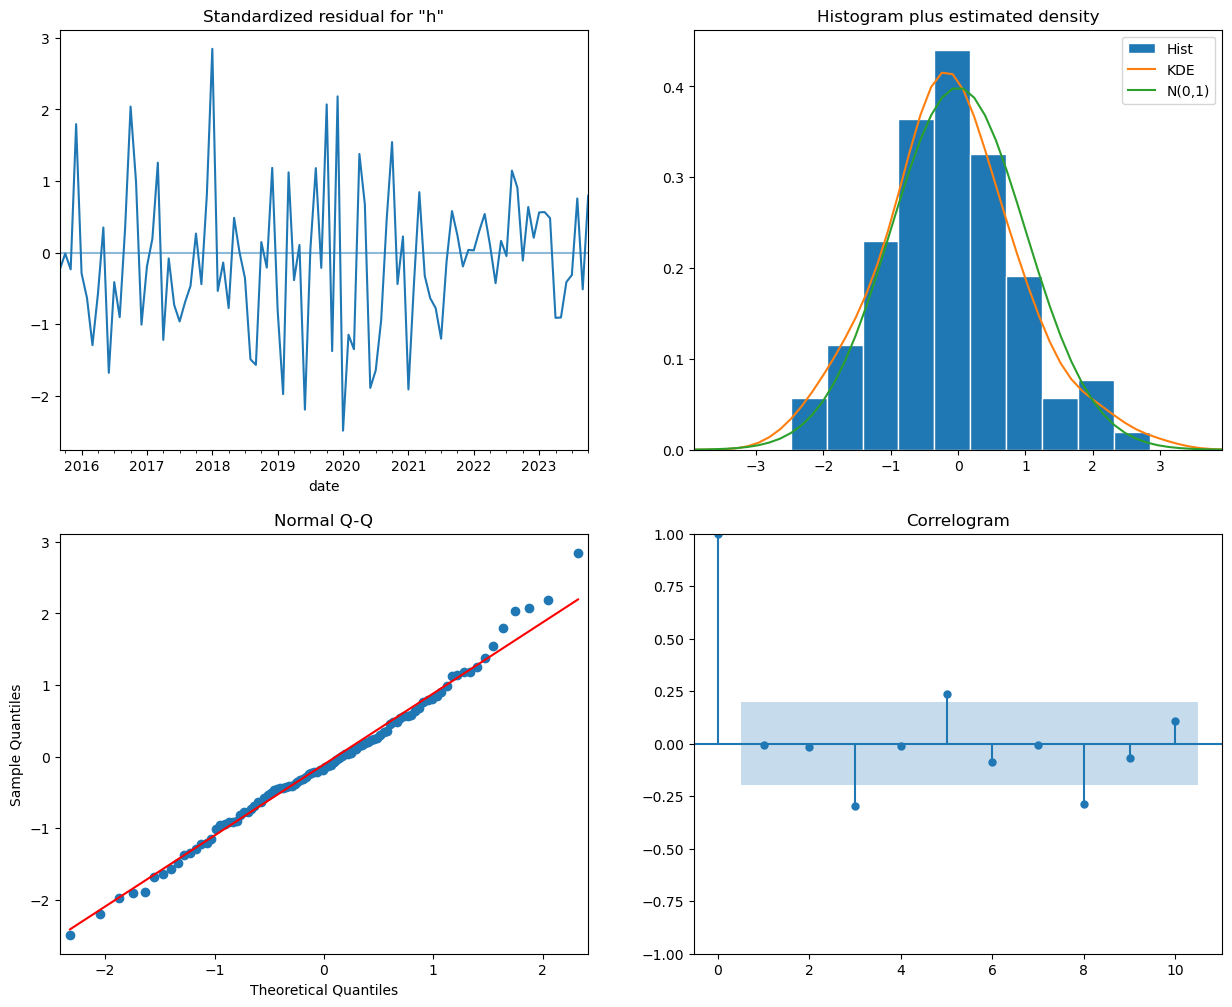

In [48]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [49]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-31'), dynamic=False)
pred_ci = pred.conf_int()

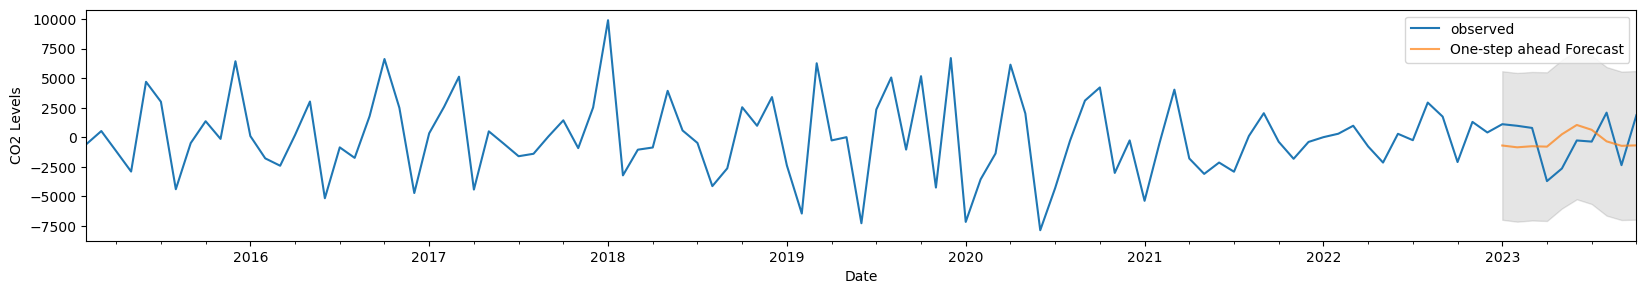

In [50]:
ax = y_diff.plot(label='observed',figsize=(20,3))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
print("Root mean squared error =", np.sqrt(mean_squared_error(pred.predicted_mean,y_diff["2023":])))
print("R2 score =", r2_score(pred.predicted_mean,y["2023":]))

Root mean squared error = 2089.3941336765088
R2 score = -109.91884160585226


In [104]:
# Assuming model_arima is your fitted ARIMA model and forecast_horizon is the number of steps to forecast

# Generate forecasts in the differenced space
forecast_diff = model_arima.forecast(steps=forecast_horizon)

# Inverse the differencing to get forecasts in the original scale
forecast_original = pd.Series(forecast_diff).cumsum() + last_observation_of_y  # Replace last_observation_of_y with the last value in your original series

NameError: name 'model_arima' is not defined

# Flow Diagram for ARIMA Time Series Analysis:

### 1. Data Preparation:
- Gather the time series data and ensure it's in a suitable format.
- Check for missing values and handle them if present.

### 2. Check for Seasonality:
- Visualize the time series to observe any repetitive patterns or cycles. Use a decomposition plot to identify trend, seasonality, and residual components.

### 3. Assess Stationarity:
- Plot the time series to visually inspect trends, rolling statistics, and stationarity.
- Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity.

### 4. Differencing:
- Apply differencing to achieve stationarity if the series is non-stationary.
- Check stationarity after differencing using the ADF test.

### 5. ACF and PACF Analysis:
- Examine the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the differenced series to determine the orders (p, d, q) for ARIMA.

### 6. Fit ARIMA Model:
- Fit the ARIMA model to the differenced series using the determined orders (p, d, q).
- Generate forecasts in the differenced space.

### 7. Inverse Differencing for Interpretation:
- Invert the differencing process to translate the forecasts back to the original scale.
- Apply cumulative sum to the forecasted differences to obtain predictions in the original scale.

### 8. Evaluate and Refine:
- Assess the model's performance using appropriate evaluation metrics (e.g., MAE, RMSE).
- Refine the model if necessary by adjusting parameters and re-fitting.


# Hagamos una práctica
Pero ahora usemos los datos en este conjunto de datos: 

The World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates. Datos: --> https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
y más específicamente: https://databank.worldbank.org/data/download/WDI_EXCEL.zip